<a href="https://colab.research.google.com/github/DhivyaaSP/Deep-Learning/blob/main/Exe_2_2_2_Number_of_training_samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
Epoch 4/1000, Training Loss: 0.0033096322354651945, Test Loss: 0.0018320566167452652
Epoch 5/1000, Training Loss: 0.003305397325518864, Test Loss: 0.001820732754319953
Epoch 6/1000, Training Loss: 0.0033021083186923032, Test Loss: 0.0018143848294014775
Epoch 7/1000, Training Loss: 0.003299132820159167, Test Loss: 0.0018104608006332596
Epoch 8/1000, Training Loss: 0.0032963067851313303, Test Loss: 0.001807823080672491
Epoch 9/1000, Training Loss: 0.0032935867174795717, Test Loss: 0.0018059054462609661
Epoch 10/1000, Training Loss: 0.0032909590283025703, Test Loss: 0.0018044052210448602
Epoch 11/1000, Training Loss: 0.003288416069958052, Test Loss: 0.001803152919260677
Epoch 12/1000, Training Loss: 0.0032859504292976007, Test Loss: 0.0018020505792279327
Epoch 13/1000, Training Loss: 0.0032835541002494417, Test Loss: 0.0018010401859133427
Epoch 14/1000, Training Loss: 0.003281218764555524, Test Loss: 0.0018000866141268093
Epoch 15/1000, T

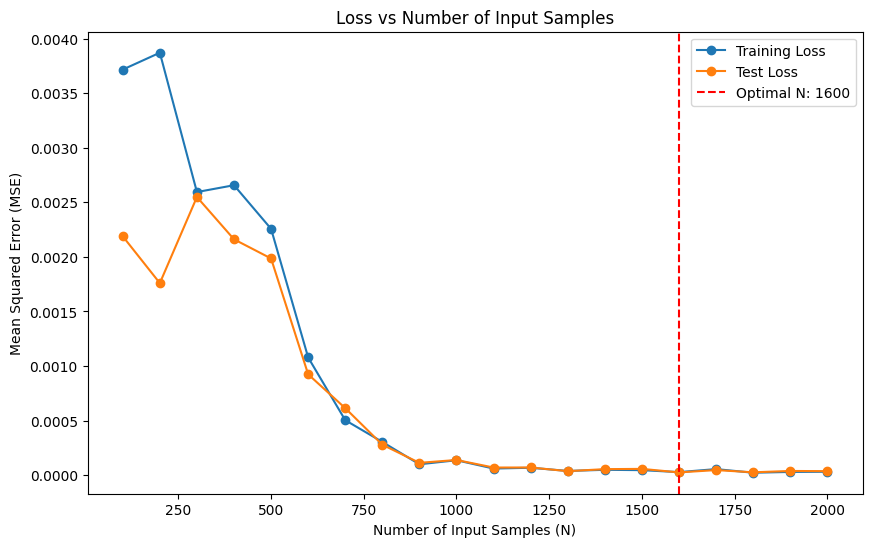

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# MLP class with one hidden layer
class MLP:
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        # Initialize the number of nodes in each layer
        self.input_nodes = input_nodes + 1  # Including bias
        self.hidden_nodes = hidden_nodes + 1  # Including bias
        self.output_nodes = output_nodes

        # Initialize weights with random values
        self.weights_input_hidden = np.random.rand(self.input_nodes, self.hidden_nodes - 1) - 0.5
        self.weights_hidden_output = np.random.rand(self.hidden_nodes, self.output_nodes) - 0.5

        # Include bias in the inputs
        self.bias_input = np.random.rand(self.input_nodes) - 0.5
        self.bias_hidden = np.random.rand(self.hidden_nodes) - 0.5

        # Initialize lists to store training and test losses
        self.training_loss_history = []
        self.test_loss_history = []

    def forward_pass(self, inputs):
        # Add bias to inputs
        inputs_with_bias = np.concatenate((inputs, [1]), axis=0)

        # Compute input and output for the hidden layer
        self.hidden_input = np.dot(inputs_with_bias, self.weights_input_hidden)
        self.hidden_output = sigmoid(self.hidden_input)
        # Add bias to hidden layer outputs
        hidden_output_with_bias = np.concatenate((self.hidden_output, [1]), axis=0)

        # Compute input and output for the output layer
        self.final_input = np.dot(hidden_output_with_bias, self.weights_hidden_output)
        self.final_output = sigmoid(self.final_input)

        return self.final_output

    def backward_pass(self, inputs, expected_output, output, learning_rate):
        # Compute error
        error = expected_output - output

        # Gradient for output weights
        d_weights_hidden_output = np.dot(np.concatenate((self.hidden_output, [1]), axis=0).reshape(-1,1),
                                         error * sigmoid_derivative(output).reshape(1, -1))

        # Error for hidden layer
        hidden_error = np.dot(self.weights_hidden_output, error * sigmoid_derivative(output))[:-1]

        # Gradient for input weights
        d_weights_input_hidden = np.dot(np.concatenate((inputs, [1]), axis=0).reshape(-1,1),
                                        hidden_error * sigmoid_derivative(self.hidden_output).reshape(1, -1))

        # Update the weights
        self.weights_hidden_output += learning_rate * d_weights_hidden_output
        self.weights_input_hidden += learning_rate * d_weights_input_hidden

    def train_and_evaluate(self, dataset, test_inputs, test_expected_output, max_epochs, learning_rate):
        # Split dataset into inputs and expected outputs
        inputs = dataset[:, :2]
        expected_output = dataset[:, 2:]

        # Initialize variables to track optimal epoch and minimum test loss
        optimal_epoch = None
        min_test_loss = float('inf')

        # Training loop
        for epoch in range(max_epochs):
            for j in range(inputs.shape[0]):
                input_sample = inputs[j]
                output = self.forward_pass(input_sample)
                self.backward_pass(input_sample, expected_output[j], output, learning_rate)

            # Calculate training loss
            training_loss = np.mean(np.square(expected_output - self.predict(inputs)))
            self.training_loss_history.append(training_loss)

            # Calculate test loss
            test_loss = np.mean(np.square(test_expected_output - self.predict(test_inputs)))
            self.test_loss_history.append(test_loss)

            # Check if test loss is minimized
            if test_loss < min_test_loss:
                min_test_loss = test_loss
                optimal_epoch = epoch + 1

            # Print out progress
            print(f"Epoch {epoch+1}/{max_epochs}, Training Loss: {training_loss}, Test Loss: {test_loss}")

        return optimal_epoch

    def predict(self, inputs):
        outputs = np.array([self.forward_pass(input_sample) for input_sample in inputs])
        return outputs

# Function to calculate the multivariate normal density
def multivariate_gaussian_density(x, mu, cov):
    n = mu.shape[0]
    diff = x - mu
    return (1. / (np.sqrt((2 * np.pi)**n * np.linalg.det(cov)))) * \
           np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))

# Parameters for the Gaussian
mu_x = np.array([0, 0])
cov_x = np.array([[0.3, -0.5],
                  [-0.5, 2]])

# Set the range of input sample sizes
input_sample_sizes = range(100, 2001, 100)  # From 100 to 1000 samples with step size 100

# Initialize lists to store test loss and optimal epochs
test_loss_values = []
training_loss_values = []
optimal_epochs = []

for N in input_sample_sizes:
    # Generate N training samples randomly
    samples = np.zeros((N, 3))
    samples[:, 0] = np.random.uniform(-2, 2, N)  # x1
    samples[:, 1] = np.random.uniform(-4, 4, N)  # x2

    # Calculate the function value for each sample
    for i in range(N):
        samples[i, 2] = multivariate_gaussian_density(samples[i, :2], mu_x, cov_x)

    # Generate new test data
    N_test = 100  # Change this to your dataset size for testing
    test_samples = np.zeros((N_test, 3))
    test_samples[:, 0] = np.random.uniform(-2, 2, N_test)  # x1 range
    test_samples[:, 1] = np.random.uniform(-4, 4, N_test)  # x2 range

    for i in range(N_test):
        test_samples[i, 2] = multivariate_gaussian_density(test_samples[i, :2], mu_x, cov_x)

    # Initialize the MLP
    mlp = MLP(input_nodes=2, hidden_nodes=10, output_nodes=1)
    optimal_epoch = mlp.train_and_evaluate(samples, test_samples[:, :2], test_samples[:, 2:], max_epochs=1000, learning_rate=0.1)

    # Record test loss, training loss, and optimal epoch
    test_loss_values.append(mlp.test_loss_history[optimal_epoch - 1])
    training_loss_values.append(mlp.training_loss_history[optimal_epoch - 1])
    optimal_epochs.append(optimal_epoch)

# Find the index of the minimum test loss value
optimal_N_index = np.argmin(test_loss_values)
optimal_N = input_sample_sizes[optimal_N_index]
min_test_loss = test_loss_values[optimal_N_index]
optimal_epoch_for_optimal_N = optimal_epochs[optimal_N_index]

print(f"Optimal Number of Input Samples (N*): {optimal_N}")
print(f"Corresponding Optimal Epoch: {optimal_epoch_for_optimal_N}")
print(f"Minimum Test Loss: {min_test_loss}")

# Plot test loss and training loss against the number of input samples
plt.figure(figsize=(10, 6))
plt.plot(input_sample_sizes, training_loss_values, marker='o', linestyle='-', label='Training Loss')
plt.plot(input_sample_sizes, test_loss_values, marker='o', linestyle='-', label='Test Loss')
plt.title('Loss vs Number of Input Samples')
plt.xlabel('Number of Input Samples (N)')
plt.ylabel('Mean Squared Error (MSE)')
plt.axvline(x=optimal_N, color='r', linestyle='--', label=f'Optimal N: {optimal_N}')
plt.legend()
plt.show()
